### Last digit of the name in label data is the target label 

In [55]:
import os
print(len(os.listdir('data')))

276


In [64]:
nums = os.listdir('data')
nums = [os.path.splitext(s)[0][-1] for s in nums]
import pandas as pd
nums = pd.DataFrame(nums)
nums.value_counts()

7    38
3    37
6    35
8    35
5    30
9    30
2    28
4    24
0    17
1     2
dtype: int64

In [51]:
from random import randint
print([randint(0,9) for _ in range(50)])

[7, 2, 4, 5, 6, 3, 6, 0, 3, 1, 7, 5, 5, 6, 3, 5, 8, 8, 1, 4, 7, 6, 2, 7, 7, 2, 6, 5, 8, 5, 9, 8, 4, 6, 0, 4, 6, 6, 4, 7, 3, 4, 9, 0, 1, 7, 6, 2, 9, 2]


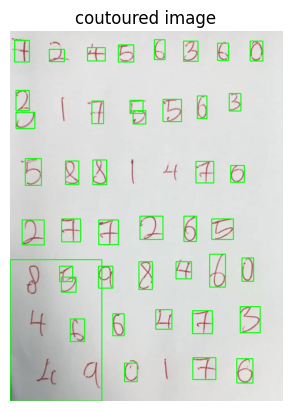

In [52]:
from utils import *
import cv2
rel_dir = 'raw image'
filename = 'wa8.jpeg'

img = cv2.imread(f'{rel_dir}/{filename}')
digits = crop_number(img.copy(), True)

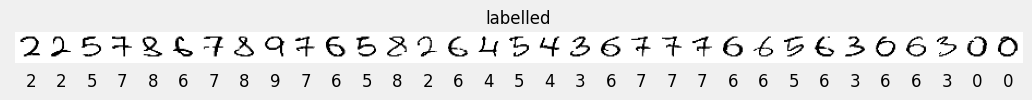

In [53]:
remaining_digits, labels = manual_label(digits)

In [54]:
save_label_digit(remaining_digits, labels)